# Dash Einführung
Dash ist ein Framework zur Erstellung von Webapps für die Datenvisualisierung, entwickelt von Plotly. Dash zielt darauf ab, dass der User so weit wie möglich in Python arbeiten kann und eignet sich gut dafür, mit Pandas zusammen verwendet zu werden.

In diesem Notebook werden die Grundlagen von Dash anhand von Beispielen vorgestellt. Die offizielle Dokumentation befindet sich hier: 

https://dash.plotly.com/

*Anmerkung: Damit Dash in der Colab-Umgebung richtig funktioniert, sollten JavaScript und Cookies im Browser erlaubt sein.*

In [23]:
!pip install jupyter-dash
!pip install dash-bootstrap-components

In [ ]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
import dash_table
import plotly.express as px
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import pandas as pd

In [ ]:
# Daten laden
iris = pd.read_csv('https://raw.githubusercontent.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/master/iris.csv')
vendors = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/vendors.csv.xz')
customers = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/customers.csv.xz')
locations = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/locations.csv.xz')
orders = pd.read_csv('https://github.com/thomas-bierhance-exxcellent/data-wrangling-praktikum/raw/master/orders.csv.xz',
                     parse_dates=['order_accepted_time', 'delivered_time', 'delivery_date'])

## Statische Apps

Mit Dash können sehr aufwändige Oberflächen mit komplexen Graphen, Auswahl- und Filterelementen (z.B. Dropdown-Menüs, Checkboxen, Slider, etc.) und Layouts erstellt werden.

Normalerweise wird Dash als normales Pythonskript ausgeführt, der Zugriff auf die erzeugte Visualisierung erfolgt über den Browser. Innerhalb dieses Notebooks/der Colab-Umgebung greifen wir aber auf **JupyterDash** zurück, damit die Oberflächen inline angezeigt werden können:

(https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e)

Für den Anfang erstmal eine minimale (Jupyter-)Dash-Anwendung:

In [ ]:
app = JupyterDash(__name__)

# Das Layout wird ähnlich wie in HTML festgelegt
app.layout = html.Div(children=[
    html.H1(children='Hallo'),
    html.Div(children='Hier könnte Ihre Dash App stehen.')
])

# Die JupyterDash-App wird im Notebook selber angezeigt
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [ ]:
app = dash.Dash(__name__)

# Das Layout wird ähnlich wie in HTML festgelegt
app.layout = html.Div(children=[
    html.H1(children='Hallo'),
    html.Div(children='Hier könnte Ihre Dash App stehen.')
])

# Die Anwendung sollte standardmäßig unter
# http://127.0.0.1:8050/ angezeigt werden
if __name__ == '__main__':
    app.run_server(debug=True)

Zum Vergleich dieselbe Anwendung in "normalem" Dash. Der Code unterscheidet sich in diesem Beispiel nur in zwei Punkten: Die Erstellung des Dash-Objektes, und der run-Befehl.

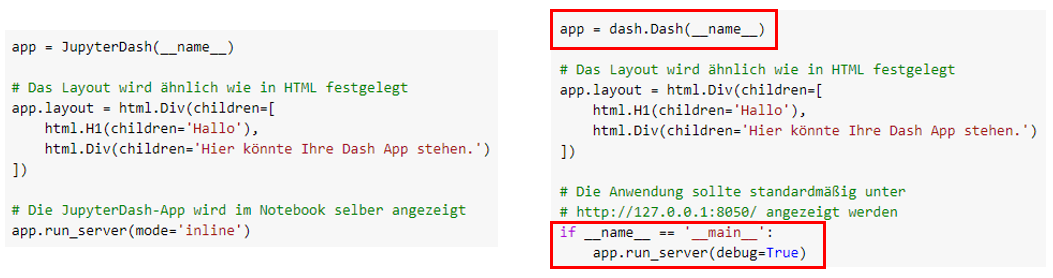

Für das Layout verwenden wir in diesem Notebook **Dash Bootstrap** (https://dash-bootstrap-components.opensource.faculty.ai/). Dies ändert nichts an den Konzepten von Dash, macht den Layout-Code bei etwas komplexeren Beispielen aber deutlich übersichtlicher.

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])


# Das Layout wird ähnlich wie in HTML festgelegt
# Der dbc.Container ist ein Dash-Bootstrap Element
app.layout = app.layout = dbc.Container([
     html.H1('Hallo'),
     html.Div('Hier ist Dash :D')
])

# Die JupyterDash-App wird im Notebook selber angezeigt
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Wir setzen jetzt einen der Iris-Plots aus dem Pandas-Notebook in Dash um. Hierfür verwenden wir das `plotly.express` Modul, oben importiert als `px`. Es ermöglicht die Erstellung interaktiver Diagramme im Browser (im Gegensatz zu Matplotlib) und wird in der offiziellen Dokumentation empfohlen: https://plotly.com/python/plotly-express/

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
# Scatterplot erzeugen
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color='species')
# Die Minimal- und Maximalwerte der Achsen
fig.update_xaxes(range=[4, 8])
fig.update_yaxes(range=[1.5, 5])

app.layout = dbc.Container(
    [
        html.H1('Iris Data'),
        dcc.Graph(id='iris-graph', figure=fig)
    ]
)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Tooltips für die einzelnen Datenpunkte werden durch Dash automatisch generiert, ebenso wie Legenden (siehe erstes Iris-Beispiel weiter unten) und eine Plot-Toolbar mit Auswahl- und Zoomwerkzeugen (die Ansicht kann mit dem "Autoscale"-Button zurückgesetzt werden).

Auch 3D-Plots können ohne großen Aufwand erstellt werden:

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
# Die Dimension 'petal_length' wird nun hinzugefügt
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width', color='species')

# Die Achsen müssen bei 3D-Plots etwas anders gesetzt werden, dies ist aber optional
fig.update_layout(
    scene = dict(
        xaxis = dict(range=[4,8]),
        yaxis = dict(range=[1.5, 5]),
        zaxis = dict(range=[0,3])
        )
)

app.layout = dbc.Container(
    [
        html.H1('Iris Data'),
        dcc.Graph(id='iris-graph', figure=fig)
    ]
)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

### Übung

Jetzt zu den Aufgaben für Dich:

1.   Erstelle aus den Restaurant-Daten einen neuen DataFrame mit den Spalten `delivery_data`, `revenue` und `total_orders`. `revenue` ist der Gesamtumsatz aller Restaurants zum jeweiligen Datum, `total_orders` die Gesamtzahl aller Bestellungen.
2.    Erstelle einen einfachen Dash-Plot mit obigem DataFrame, mit dem Datum auf der x-Achse und dem Gesamtumsatz auf der y-Achse.




In [ ]:
# Platz für Deine Übungen :)

### Lösung

In [ ]:
# 1. DataFrame erstellen
restaurant_df = orders[['delivery_date', 'grand_total']].groupby('delivery_date').agg(revenue=('grand_total', 'sum'), total_orders=('grand_total', 'count')).reset_index()
restaurant_df

,delivery_date,revenue,total_orders
0,2019-05-31,833.6,45
1,2019-06-01,3903.3,203
2,2019-06-02,3168.1,185
3,2019-06-03,3048.1,180
4,2019-06-04,4208.4,246
...,...,...,...
254,2020-03-20,35.9,4
255,2020-03-21,66.1,6
256,2020-03-24,12.2,1
257,2020-04-01,7.6,1


In [ ]:
# 2. Dash-Plot erstellen
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
# Zur Abwechslung mal einen Line-Plot
fig = px.line(restaurant_df, x = 'delivery_date', y='revenue')

app.layout = dbc.Container(
    [
        html.H1('Restaurant Data'),
        dcc.Graph(id='restaurant-graph', figure=fig)
    ]
)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## Interaktive Apps mit Callbacks
Ein höherer Grad an Interaktion wird in Dash über Callbacks erreicht. Mit Callbacks kann auf Userinputs reagiert werden, um zum Beispiel bei der Auswahl in einer Dropdown-Komponente eine andere UI-Komponenten wie ein Diagramme anzupassen. Auch hierzu wieder ein Minimalbeispiel:

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Für Callbacks sind die component_ids im Layout wichtig
app.layout = dbc.Container(
    [
        html.H6('Mit dem Inputfeld kann der Text im Output verändert werden'),
        dbc.Input(id='my-input', type='text', value='Input'),
        html.Br(),
        html.Div(id='my-output', children='Input')
    ]
)

# Der Callback wird immer aufgerufen, sobald sich eine Property des Inputs ändert,
# in diesem Fall mit component_id='my-input' im Layout 
# Der Output wird analog über component_id='my-output' angesprochen
@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return 'Output: {}'.format(input_value)


app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Callbacks werden in Dash mit `@app.callback` und den Output- und Inputparametern annotiert. Die Annotation verknüpft die Callbackfunktion über ID- und Property-Werte mit den entsprechenden Elementen, die im Layout spezifiziert sind. Alle Callbacks werden beim Start der Anwendung einmal ausgeführt, um Elemente initial einzurichten.

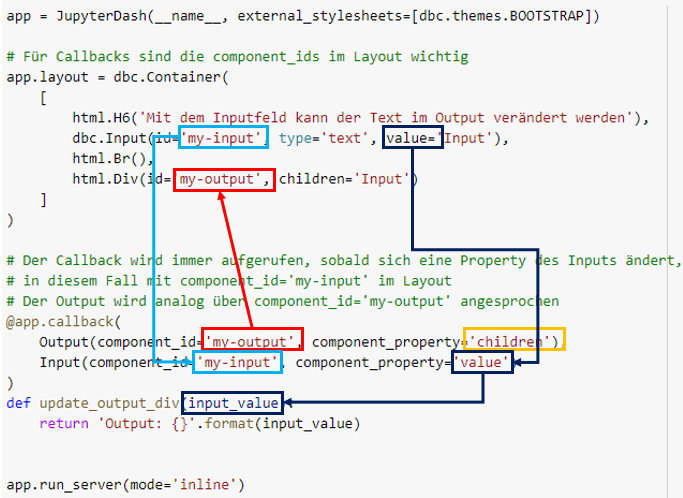

Über Properties werden die Attribute der Layout-Elemente spezifiziert, die für die Callback-Funktion relevant sind. Im Output können auch mehrere Attribute gleichzeitig verändert werden, ein Beispiel hierzu kommt in der DataTable-Sektion am Ende des Notebooks.

Das Input-Feld in diesem Beispiel ist Teil der Dash Core Components (https://dash.plotly.com/dash-core-components), ebenso wie `dcc.Graph `, welcher uns in den vorherigen Beispielen bereits begegnet ist.

Mithilfe von Callbacks bauen wir nun in die Iris-App eine einfache Filtermöglichkeit ein: Ein Dropdown-Menü (ebenfalls aus `dcc`), mit welchem Iris-Spezies ausgewählt werden können.

*Anmerkung: In diesem Beispiel sind die Farben nicht an die Spezies gebunden, d.h. wenn nur eine Spezies ausgewählt wird, wird diese immer in Blau angezeigt. Um den Code halbwegs übersichtlich zu halten, belassen wir das in diesem Notebook so. Das Festlegen der Farben für Daten ist aber ebenfalls möglich: https://plotly.com/python/discrete-color/#directly-mapping-colors-to-data-values*

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Die Erstellung des Plots an sich kapseln wir zwecks Übersichtlichkeit in eine
# eigene Methode
def generate_my_plot(df):
  fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
  # Die Minimal- und Maximalwerte der Achsen
  fig.update_xaxes(range=[4, 8])
  fig.update_yaxes(range=[1.5, 5])
  return fig

app.layout = dbc.Container([
     html.H1('Iris Data'),
     dcc.Dropdown(id='species-select', 
                  options=[{'label': i, 'value': i} for i in iris['species'].unique()], 
                  value=None),
     dcc.Graph(id='iris-graph', figure=None) # Graph wird durch den initialen Callback-Aufruf erzeugt
])



# Der Callback wird aufgerufen sobald, sich eine Input-Property ändert
@app.callback(
    Output(component_id='iris-graph', component_property='figure'),
    [Input(component_id='species-select', component_property='value')]
)
def update_graph(input_value):
  # Falls keine einzelne Spezies ausgewählt ist, alle anzeigen
  if not input_value:
    iris_updated = iris
  else:
    iris_updated = iris.loc[iris['species']==input_value]
  return generate_my_plot(iris_updated)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

### Mehrere Inputs
Nur nach der Spezies zu filtern ist natürlich zu einfach, deshalb wollen wir zusätzlich nach Kelchblattgröße filtern können. Zur Abwechslung verwenden wir hierzu Slider-Elemente.

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

def generate_my_plot(df):
  fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
  # Die Minimal- und Maximalwerte der Achsen
  fig.update_xaxes(range=[4, 8])
  fig.update_yaxes(range=[1.5, 5])
  return fig

app.layout = dbc.Container([
      html.H1('Iris Data'),
      dbc.FormGroup([
                    dbc.Label('Species:'),
                    dcc.Dropdown(id='species-select', 
                    options=[{'label': i, 'value': i} for i in iris['species'].unique()], 
                    value=None)
      ]),
      dbc.FormGroup([
                    dbc.Label('Sepal length:'),
                    dcc.RangeSlider(id='sepal-length-select', 
                                    count=1,min=4,max=8,step=0.5,
                                    value=[4,8], 
                                    marks={i: '{}'.format(i) for i in range(4,9)}),
      ]),
      dbc.FormGroup([
                    dbc.Label('Sepal width:'),
                    dcc.RangeSlider(id='sepal-width-select', 
                                    count=1,min=2,max=5,step=0.5,
                                    value=[2, 5], 
                                    marks={i: '{}'.format(i) for i in range(2, 6)})
      ]),
      dcc.Graph(id='iris-graph', figure=None)
])



# Die zusätzlichen Inputs werden einfach hinzugefügt
@app.callback(
    Output(component_id='iris-graph', component_property='figure'),
    [Input(component_id='species-select', component_property='value'),
     Input(component_id='sepal-length-select', component_property='value'),
     Input(component_id='sepal-width-select', component_property='value')]
)
def update_graph(species_select, sepal_length_select, sepal_width_select):
  # Spezies filtern
  if not species_select:
    iris_updated = iris
  else:
    iris_updated = iris.loc[iris['species']==species_select]
  # Sliderwerte filtern
  iris_updated = iris_updated.loc[iris_updated['sepal_length'].between(sepal_length_select[0],sepal_length_select[1])]
  iris_updated = iris_updated.loc[iris_updated['sepal_width'].between(sepal_width_select[0],sepal_width_select[1])]
  return generate_my_plot(iris_updated)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## Anpassung des Layouts
Die Filterelemente sind momentan etwas groß. Bevor wir unserer App also weitere Elemente hinzufügen, sollten wir das Layout noch ein wenig anpassen. Da wir Dash Bootstrap benutzen, können wir das entsprechende Grid-Layout nutzen, das mit Reihen (`dbc.Row`) und Spalten (`dbc.Col`) arbeitet. 

(https://dash-bootstrap-components.opensource.faculty.ai/docs/components/layout)

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

def generate_my_plot(df):
  fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
  # Die Minimal- und Maximalwerte der Achsen
  fig.update_xaxes(range=[4, 8])
  fig.update_yaxes(range=[1.5, 5])
  return fig

app.layout = dbc.Container([
      html.H1('Iris Data'),
      dbc.Row([
               dbc.Col(dbc.FormGroup([
                  dbc.Label('Species:'),
                  dcc.Dropdown(id='species-select', 
                  options=[{'label': i, 'value': i} for i in iris['species'].unique()], 
                  value=None)
        	      ]), width=4),
               
               dbc.Col(dbc.FormGroup([
                    dbc.Label('Sepal length:'),
                    dcc.RangeSlider(id='sepal-length-select', 
                                    count=1,min=4,max=8,step=0.5,
                                    value=[4,8], 
                                    marks={i: '{}'.format(i) for i in range(4,9)})
               ]), width=4),
               dbc.Col(dbc.FormGroup([
                    dbc.Label('Sepal width:'),
                    dcc.RangeSlider(id='sepal-width-select', 
                                    count=1,min=2,max=5,step=0.5,
                                    value=[2, 5], 
                                    marks={i: '{}'.format(i) for i in range(2, 6)})
                ]), width=4)
      ]),
      dcc.Graph(id='iris-graph', figure=None)
])



# Die zusätzlichen Inputs werden einfach hinzugefügt
@app.callback(
    Output(component_id='iris-graph', component_property='figure'),
    [Input(component_id='species-select', component_property='value'),
     Input(component_id='sepal-length-select', component_property='value'),
     Input(component_id='sepal-width-select', component_property='value')]
)
def update_graph(species_select, sepal_length_select, sepal_width_select):
  # Spezies filtern
  if not species_select:
    iris_updated = iris
  else:
    iris_updated = iris.loc[iris['species']==species_select]
  # Sliderwerte filtern
  iris_updated = iris_updated.loc[iris_updated['sepal_length'].between(sepal_length_select[0],sepal_length_select[1])]
  iris_updated = iris_updated.loc[iris_updated['sepal_width'].between(sepal_width_select[0],sepal_width_select[1])]
  return generate_my_plot(iris_updated)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

### Übung
Jetzt zu den Aufgaben für Dich:
1.  Füge zum Restaurant-Plot ein Dropdown-Menü hinzu, so dass die Anzeige auf der y-Achse zwischen dem Umsatz und der Anzahl an Bestellungen umgestellt werden kann.
2. Füge einen Slider ein, mit dem dem die Daten zusätzlich nach minimaler und maximaler `delivery_distance` gefiltert werden können. Diese gefilterten Daten sollen in einem separaten Graphen angezeigt werden, der ebenfalls auf die Dropdownauswahl aus Aufgabe 1 reagiert.

In [ ]:
# Platz für Deine Übungen :)

### Lösung

In [ ]:
restaurant_df = orders[['delivery_date', 'grand_total']].groupby('delivery_date').agg(revenue=('grand_total', 'sum'), total_orders=('grand_total', 'count')).reset_index()

In [ ]:
# 1. Dropdown-Menü
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
                            html.H1('Restaurant Data'),
                            dcc.Dropdown(id='axes-select',
                                         options=[{'label': i, 'value': i} for i in ['revenue', 'total_orders']],
                                         value='revenue',
                                         # clearable=False sorgt dafür, dass immer einer der Werte ausgewählt sein muss
                                         clearable=False),
                            dcc.Graph(id='restaurant-graph', figure=None)
])

@app.callback(
    Output(component_id='restaurant-graph', component_property='figure'),
    [Input(component_id='axes-select', component_property='value')]
)
def update_graph(input_value):
  return px.line(restaurant_df, x = 'delivery_date', y=input_value)

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [ ]:
# 2. Slider

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Neue Methode, um Distanzfilter zu berücksichtigen
def filter_restaurant_df(lower_distance, upper_distance):
  # Distanzen im gewählten Bereich selektieren
  df = orders.loc[orders['delivery_distance'].between(lower_distance, upper_distance)]
  # Nun wieder den Restauren-Dataframe wie zuvor zusammenbauen
  df = df[['delivery_date', 'grand_total']].groupby('delivery_date')
  restaurant_df = pd.concat([df.sum(), df.count()], axis=1)
  restaurant_df.columns = ['revenue', 'total_orders']
  return restaurant_df.reset_index()

def generate_my_plot(df, column):
  # Die Achsenbereiche werden fixiert, ansonsten passen sie sich den Daten an
  fig = px.line(df, x = 'delivery_date', y=column, range_x=[orders['delivery_date'].min(),orders['delivery_date'].max()])
  fig.update_yaxes(range=[0, 15000]) 
  return fig

app.layout = dbc.Container([
                            html.H1('Restaurant Data'),
                            dbc.Row([
                                dbc.Col(dbc.FormGroup([
                                                dbc.Label('x-Axis data:'),
                                                dcc.Dropdown(id='axes-select',
                                                             options=[{'label': i, 'value': i} for i in ['revenue', 'total_orders']],
                                                             value='revenue',
                                                             clearable=False) 
                                ]), width=4),
                                dbc.Col(dbc.FormGroup([
                                                dbc.Label('Delivery distance:'),
                                                dcc.RangeSlider(id='delivery-distance-select', 
                                                                count=1,min=0,max=20,step=1,
                                                                value=[0,20], 
                                                                marks={0:'0', 5:'5', 10:'10', 15: '15', 20:'20'}),
                                ]), width=4)
                            ]),
                            dbc.Row([
                                     dbc.Col(dcc.Graph(id='restaurant-graph', figure=None), width=6),
                                     dbc.Col(dcc.Graph(id='restaurant-graph-comparison', figure=None), width=6)
                            ])
])    

@app.callback(
    [Output(component_id='restaurant-graph', component_property='figure'),
    Output(component_id='restaurant-graph-comparison', component_property='figure')],
    [Input(component_id='axes-select', component_property='value'),
     Input(component_id='delivery-distance-select', component_property='value')]
)
def update_graph(axes_select, delivery_distance_select):
  fig1 = generate_my_plot(restaurant_df, axes_select)
  fig2 = generate_my_plot(filter_restaurant_df(delivery_distance_select[0], delivery_distance_select[1]),
                          axes_select)
  return fig1, fig2

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## DataTable
Für tiefergehende Datenanalyse kann in einer Dash-Anwendung natürlich auch mehr als nur Graphen angezeigt werden. Ein mächtiges Werkzeug hierfür sind DataTables. Diese ermöglichen nicht nur die Anzeige von Daten, sondern können auch für das Editieren oder Filtern verwendet werden: 
https://dash.plotly.com/datatable

Als Beispiel stellen wir die Iris-Daten in einer DataTable dar:

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = dash_table.DataTable(
    id='species-table',
    columns=[{'name': i, 'id': i} for i in iris.columns],
    # *.to_dict('records') ist notwendig, um den DataFrame in eine Form zu konvertieren, die von der DataTable verstanden wird
    data=iris.to_dict('records')) 
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

Im letzten Schritt werden wir nun eine Iris-Datatable erstellen, mit der eine Spezies ausgewählt und zusätzliche Informationen zu ihr angezeigt werden können. In diesem Codebeispiel sieht man auch gut, wie mehrere Output-Parameter und -Properties für das Element `species-table` spezifiziert werden.

In [ ]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

iris_info = pd.DataFrame({'species': ['species-setosa','species-versicolor','species-virginica', ],
                          'taxa_named_by': ['Peter Simon Pallas', 'Carl Linnaeus', 'Carl Linnaeus'],
                          'synonym': ['Iris arctica', 'Iris pulchella', 'Iris caroliniana']})

app.layout = dbc.Container([
      html.H1('Iris DataTables'),
      # DataTables hinzufügen
      dbc.FormGroup([
                    dbc.Label('Species data selector:'),
                    dash_table.DataTable(
                    id='species-select-table',
                    columns=[{'name': i, 'id': i} for i in iris_info.columns],
                    data=iris_info.to_dict('records'),
                    row_selectable='single')
      ]),
      dash_table.DataTable(
          id='species-table',
          columns=[{'name': i, 'id': i} for i in iris.columns],
          data=iris.to_dict('records'),
          page_action='native',
          page_size = 10)
])

# Hier brauchen wir jetzt mehrere Outputs, um die DataTable anzupassen;
# auch hier ist die Reihenfolge wichtig!
@app.callback(
    [Output('species-table', 'columns'), Output('species-table', 'data')],
    [Input('species-select-table', 'selected_rows')]
)
def update_species_table(input_value):
  if not input_value:
    iris_updated = iris
  else:
    iris_updated = iris.loc[iris['species']==iris_info['species'][input_value[0]]]

  columns=[{'name': i, 'id': i} for i in iris_updated.columns]
  data=iris_updated.to_dict('records')
  return columns, data

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

### Übung
Jetzt zu den Aufgaben für Dich:
1.  Erstelle zwei DataTables: In der ersten sollen Kundendaten gelistet werden, und zwar die `customer_id`, und die Summe aller Zahlungen des entsprechenden Kunden (`grand_total`). Die Zeilen dieser DataTable sollen selektierbar sein. Wird ein Kundeneintrag selektiert, sollen in der zweiten DataTable alle Bestellungen des entsprechenden Kunden gelistet werden.



In [ ]:
# Platz für Deine Übungen :)

### Lösung

In [ ]:
restaurant_df = orders[['delivery_date', 'grand_total']].groupby('delivery_date').agg(revenue=('grand_total', 'sum'), total_orders=('grand_total', 'count')).reset_index()

In [ ]:
# 1. Kunden-Liste
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# In dieser Funktion wird der DataFrame für die erste Tabelle erzeugt
def filter_customer_df():
  customers_df = orders[['customer_id', 'grand_total']]
  # Durch sum() werden die Customer-IDs zu Indizes, wir wollen sie aber als Spalte;
  # reset_index() macht genau das
  customers_df = customers_df.groupby('customer_id').sum().reset_index()
  # Die Geldbeträge enthalten stellenweise sehr viele Nachkommastellen -> Runden
  customers_df['grand_total'] = customers_df['grand_total'].apply(lambda x: round(x, 2))
  return customers_df

customers_df = filter_customer_df()


# Die Kunden-Auswahl-Tabelle
customer_controls = dbc.Card([
                                
])

app.layout = dbc.Container([
                            html.H1('Customer Data'),
                            dbc.FormGroup([
                                           dbc.Label('Customers:'),
                                           dash_table.DataTable(
                                               id='customer-table',
                                               columns=[{'name': i, 'id': i} for i in customers_df.columns],
                                               data=customers_df.to_dict('records'),
                                               row_selectable='single',
                                               style_table = {'overflowY': 'auto'},
                                               page_action = 'native',
                                               page_size = 10,
                                               # Die css Einstellung verhindert, dass die DataTable an den Rändern abgeschnitten wird
                                               css=[{'selector': '.row', 'rule': 'margin: 0'}]
                                            )
                                ]),
                            dbc.FormGroup([
                                           dbc.Label('', id='orders-label'),
                                           html.Br(),
                                           dash_table.DataTable(
                                               id='orders-table',
                                               columns=[{'name': i, 'id': i} for i in orders.columns],
                                               data=orders.to_dict('records'),
                                               style_table = {'overflowY': 'auto'},
                                               page_action = 'native',
                                               page_size = 10,
                                               css=[{'selector': '.row', 'rule': 'margin: 0'}]
                                            )
                            ])
])

@app.callback(
    Output(component_id='orders-label', component_property='children'),
    Output(component_id='orders-table', component_property='data'),
    [Input(component_id='customer-table', component_property='selected_rows')]
)
def update_orders_table(selected_rows):
  if not selected_rows:
    customer_id = customers_df['customer_id'][0]
  else:
    customer_id = customers_df['customer_id'][selected_rows[0]]
  label_string = 'Orders for customer {}:'.format(customer_id)
  orders_updated = orders[orders['customer_id'] == customer_id].to_dict('records')
  return label_string, orders_updated

app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [ ]:
orders[orders['customer_id'] == 'MB7VY5F']

,customer_id,grand_total,vendor_rating,driver_rating,delivery_distance,order_accepted_time,delivered_time,delivery_date,vendor_id,location_number
2,MB7VY5F,14.4,NaN,0.0,0.0,NaT,NaT,2019-07-31,83,0
9366,MB7VY5F,41.9,NaN,0.0,0.0,NaT,NaT,2019-09-02,83,0
18006,MB7VY5F,27.5,NaN,0.0,0.0,NaT,NaT,2019-07-08,83,0
32502,MB7VY5F,25.0,NaN,0.0,0.0,NaT,NaT,2019-06-22,83,0


In [ ]:
app = JupyterDash(__name__)
app.layout = dash_table.DataTable(
    id='customer-table',
    columns=[{"name": i, "id": i} for i in customers_df.columns],
    data=customers_df.to_dict('records'),
    row_selectable="single",
    style_table = {'overflowY': 'auto'}
    )
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

## Weiterführende Ressourcen

*  Dash Gallery (Umfangreiche Beispielsammlung für Dash-Apps, inkl. Source-Code): https://dash-gallery.plotly.host/Portal/